In [12]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cleaning

make sampling even

1. reduce the dataset by sampling a smaller size (35515 rows), even distribution of categories
2. min-max scale the features to account for different ranges in data like BMI
3. add an intercept bias term to features
4. split into training/test data

In [2]:
df = pd.read_csv('../archive/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# columns should be type int -- none are float or categorical
df = df.astype(int)

In [4]:
# reduce dataset by sampling 
sample_size = 0.3
random_state = 1

df_small = df.sample(frac=0.2, random_state=1)
df_small.shape

(50736, 22)

In [5]:
# get the features
df_feat = df_small.drop("Diabetes_012", axis=1)
df_feat.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
235899,1,0,1,23,1,0,0,1,1,1,...,1,0,2,0,0,0,0,13,6,6
74852,0,0,1,22,1,0,1,1,1,1,...,1,0,2,0,5,0,1,9,6,8
8205,1,1,1,26,1,0,0,1,1,1,...,1,0,2,0,0,0,0,11,4,6
127632,1,0,1,39,0,0,0,1,1,1,...,1,0,4,0,0,0,1,11,6,5
32021,0,0,1,22,1,0,0,0,1,1,...,1,0,1,0,0,0,0,10,6,8


In [6]:
# get the y value
df_y = df_small.loc[:,"Diabetes_012"]
df_y

235899    0
74852     2
8205      0
127632    2
32021     0
         ..
52177     0
94042     2
188075    0
16561     0
38201     0
Name: Diabetes_012, Length: 50736, dtype: int64

In [7]:
# min max scaling, rounded to 3 decimal places
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(df_feat).round(3)

In [8]:
# Add a new column filled with ones -- for intercept/bias term
X_scale = np.hstack((X_scale,np.ones([X_scale.shape[0],1], X_scale.dtype)))
X_scale

array([[1.   , 0.   , 1.   , ..., 1.   , 0.714, 1.   ],
       [0.   , 0.   , 1.   , ..., 1.   , 1.   , 1.   ],
       [1.   , 1.   , 1.   , ..., 0.6  , 0.714, 1.   ],
       ...,
       [1.   , 0.   , 1.   , ..., 0.8  , 0.   , 1.   ],
       [1.   , 1.   , 1.   , ..., 0.8  , 1.   , 1.   ],
       [0.   , 0.   , 1.   , ..., 1.   , 1.   , 1.   ]])

In [9]:
# then split into training and test datasets
y = df_y.to_numpy()

[X_train, X_test, y_train, y_test] = train_test_split(X_scale, y, test_size = .3)

# we would then train the model on the training set
X_train, y_train

(array([[1.   , 0.   , 1.   , ..., 0.8  , 1.   , 1.   ],
        [1.   , 0.   , 1.   , ..., 1.   , 1.   , 1.   ],
        [0.   , 1.   , 1.   , ..., 1.   , 1.   , 1.   ],
        ...,
        [0.   , 1.   , 1.   , ..., 0.8  , 1.   , 1.   ],
        [1.   , 0.   , 1.   , ..., 0.8  , 0.714, 1.   ],
        [1.   , 1.   , 1.   , ..., 0.8  , 0.857, 1.   ]]),
 array([2, 0, 0, ..., 0, 0, 0]))

# MLP

## sklearn

- ~45 seconds to fit: 300 iterations, 1 hidden layer size 100

Loss function

ADAM:
- 0.837, hidden = (100,)
- 0.847, hidden = (50,)
- 0.848 , hidden = (15,)
- 0.841, hidden = (50,20)
- 0.846, hidden = (20,10,)

tanh + adam
- 

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [45]:
clf = MLPClassifier(
    random_state=1, 
    max_iter=300,
    hidden_layer_sizes=(20, 10),
    learning_rate='invscaling',
    activation='relu'
                    ).fit(X_train, y_train)

In [46]:
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

0.8465935221076145

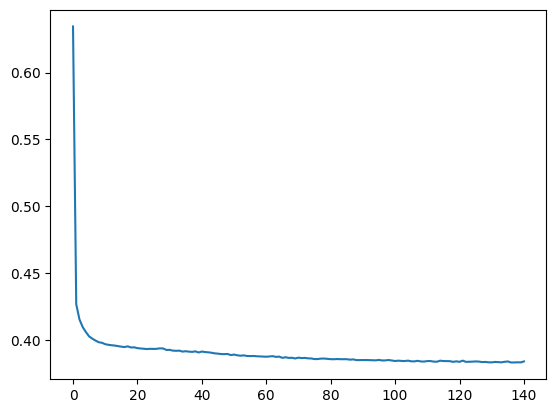

In [47]:
# plot the loss curve
plt.plot(clf.loss_curve_)

In [26]:
clf.classes_

array([0, 1, 2])

In [22]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## pytorch